In [7]:
!pip install pybel pybel-tools networkx matplotlib seaborn pandas -q

import pybel
import pybel.dsl as dsl
from pybel import BELGraph
from pybel.io import to_pickle, from_pickle
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("PyBEL Advanced Tutorial: Biological Expression Language Ecosystem")
print("=" * 65)

PyBEL Advanced Tutorial: Biological Expression Language Ecosystem


In [8]:
print("\n1. Building a Biological Knowledge Graph")
print("-" * 40)

graph = BELGraph(
    name="Alzheimer's Disease Pathway",
    version="1.0.0",
    description="Example pathway showing protein interactions in AD",
    authors="PyBEL Tutorial"
)

app = dsl.Protein(name="APP", namespace="HGNC")
abeta = dsl.Protein(name="Abeta", namespace="CHEBI")
tau = dsl.Protein(name="MAPT", namespace="HGNC")
gsk3b = dsl.Protein(name="GSK3B", namespace="HGNC")
inflammation = dsl.BiologicalProcess(name="inflammatory response", namespace="GO")
apoptosis = dsl.BiologicalProcess(name="apoptotic process", namespace="GO")


graph.add_increases(app, abeta, citation="PMID:12345678", evidence="APP cleavage produces Abeta")
graph.add_increases(abeta, inflammation, citation="PMID:87654321", evidence="Abeta triggers neuroinflammation")

tau_phosphorylated = dsl.Protein(name="MAPT", namespace="HGNC",
                                variants=[dsl.ProteinModification("Ph")])
graph.add_increases(gsk3b, tau_phosphorylated, citation="PMID:11111111", evidence="GSK3B phosphorylates tau")
graph.add_increases(tau_phosphorylated, apoptosis, citation="PMID:22222222", evidence="Hyperphosphorylated tau causes cell death")
graph.add_increases(inflammation, apoptosis, citation="PMID:33333333", evidence="Inflammation promotes apoptosis")

graph.add_association(abeta, tau, citation="PMID:44444444", evidence="Abeta and tau interact synergistically")

print(f"Created BEL graph with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges")


1. Building a Biological Knowledge Graph
----------------------------------------
Created BEL graph with 7 nodes and 8 edges


In [9]:
print("\n2. Advanced Network Analysis")
print("-" * 30)

degree_centrality = nx.degree_centrality(graph)
betweenness_centrality = nx.betweenness_centrality(graph)
closeness_centrality = nx.closeness_centrality(graph)

most_central = max(degree_centrality, key=degree_centrality.get)
print(f"Most connected node: {most_central}")
print(f"Degree centrality: {degree_centrality[most_central]:.3f}")


2. Advanced Network Analysis
------------------------------
Most connected node: p(CHEBI:Abeta)
Degree centrality: 0.667


In [10]:
print("\n3. Biological Entity Classification")
print("-" * 35)

node_types = Counter()
for node in graph.nodes():
    node_types[node.function] += 1

print("Node distribution:")
for func, count in node_types.items():
    print(f"  {func}: {count}")


3. Biological Entity Classification
-----------------------------------
Node distribution:
  Protein: 5
  BiologicalProcess: 2


In [11]:
print("\n4. Pathway Analysis")
print("-" * 20)

proteins = [node for node in graph.nodes() if node.function == 'Protein']
processes = [node for node in graph.nodes() if node.function == 'BiologicalProcess']

print(f"Proteins in pathway: {len(proteins)}")
print(f"Biological processes: {len(processes)}")

edge_types = Counter()
for u, v, data in graph.edges(data=True):
    edge_types[data.get('relation')] += 1

print("\nRelationship types:")
for rel, count in edge_types.items():
    print(f"  {rel}: {count}")


4. Pathway Analysis
--------------------
Proteins in pathway: 5
Biological processes: 2

Relationship types:
  increases: 5
  association: 2
  hasVariant: 1


In [12]:
print("\n5. Literature Evidence Analysis")
print("-" * 32)

citations = []
evidences = []
for _, _, data in graph.edges(data=True):
    if 'citation' in data:
        citations.append(data['citation'])
    if 'evidence' in data:
        evidences.append(data['evidence'])

print(f"Total citations: {len(citations)}")
print(f"Unique citations: {len(set(citations))}")
print(f"Evidence statements: {len(evidences)}")


5. Literature Evidence Analysis
--------------------------------
Total citations: 7
Unique citations: 6
Evidence statements: 7


In [13]:
print("\n6. Subgraph Analysis")
print("-" * 22)

inflammation_nodes = [inflammation]
inflammation_neighbors = list(graph.predecessors(inflammation)) + list(graph.successors(inflammation))
inflammation_subgraph = graph.subgraph(inflammation_nodes + inflammation_neighbors)

print(f"Inflammation subgraph: {inflammation_subgraph.number_of_nodes()} nodes, {inflammation_subgraph.number_of_edges()} edges")


6. Subgraph Analysis
----------------------
Inflammation subgraph: 3 nodes, 2 edges


In [14]:
print("\n7. Advanced Graph Querying")
print("-" * 28)

try:
    paths = list(nx.all_simple_paths(graph, app, apoptosis, cutoff=3))
    print(f"Paths from APP to apoptosis: {len(paths)}")
    if paths:
        print(f"Shortest path length: {len(paths[0])-1}")
except nx.NetworkXNoPath:
    print("No paths found between APP and apoptosis")

apoptosis_inducers = list(graph.predecessors(apoptosis))
print(f"Factors that increase apoptosis: {len(apoptosis_inducers)}")


7. Advanced Graph Querying
----------------------------
Paths from APP to apoptosis: 1
Shortest path length: 3
Factors that increase apoptosis: 2



8. Data Export and Visualization
-----------------------------------


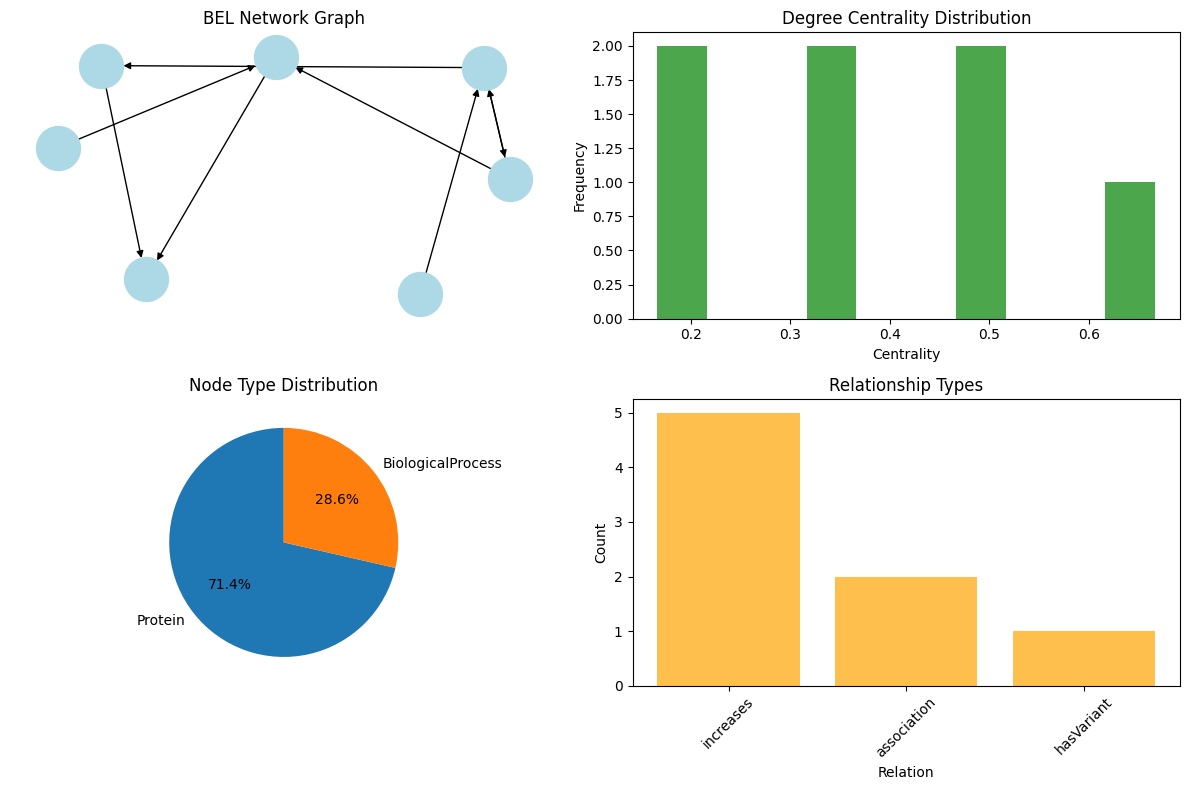

In [15]:
print("\n8. Data Export and Visualization")
print("-" * 35)

adj_matrix = nx.adjacency_matrix(graph)
node_labels = [str(node) for node in graph.nodes()]

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
pos = nx.spring_layout(graph, k=2, iterations=50)
nx.draw(graph, pos, with_labels=False, node_color='lightblue',
        node_size=1000, font_size=8, font_weight='bold')
plt.title("BEL Network Graph")

plt.subplot(2, 2, 2)
centralities = list(degree_centrality.values())
plt.hist(centralities, bins=10, alpha=0.7, color='green')
plt.title("Degree Centrality Distribution")
plt.xlabel("Centrality")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
functions = list(node_types.keys())
counts = list(node_types.values())
plt.pie(counts, labels=functions, autopct='%1.1f%%', startangle=90)
plt.title("Node Type Distribution")

plt.subplot(2, 2, 4)
relations = list(edge_types.keys())
rel_counts = list(edge_types.values())
plt.bar(relations, rel_counts, color='orange', alpha=0.7)
plt.title("Relationship Types")
plt.xlabel("Relation")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()